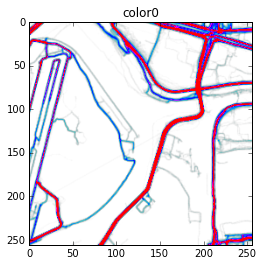

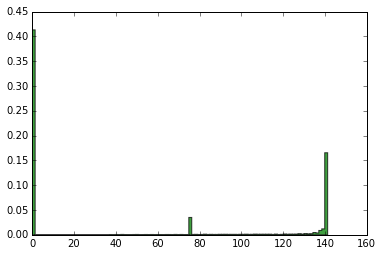

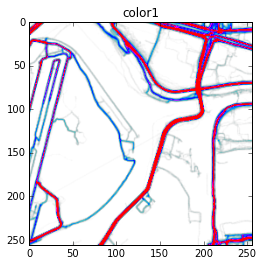

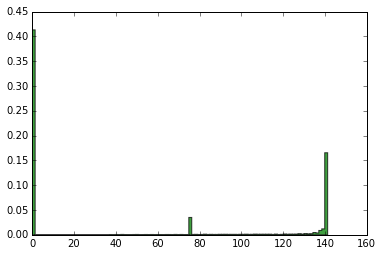

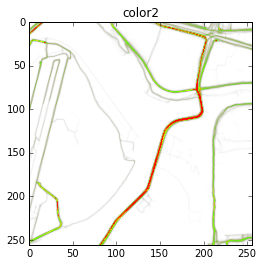

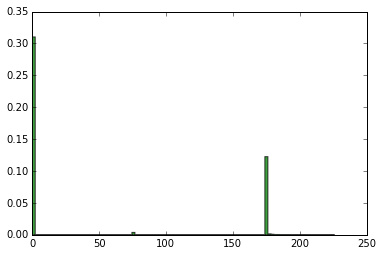

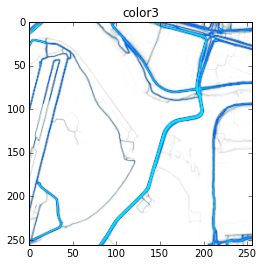

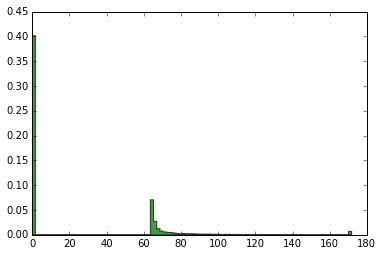

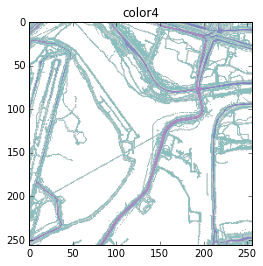

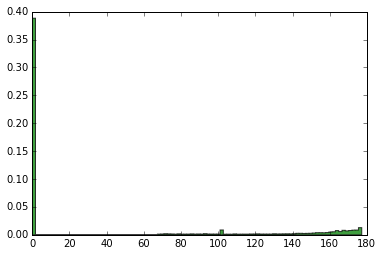

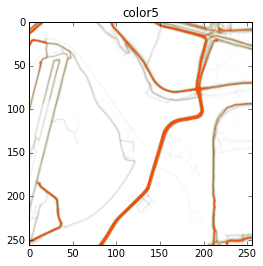

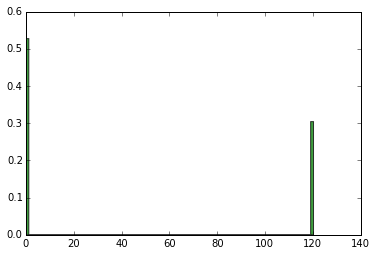

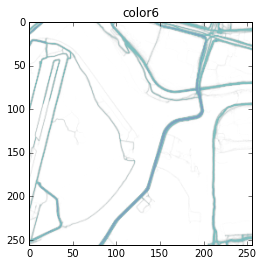

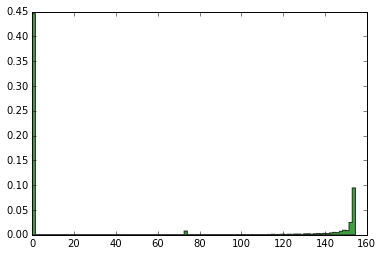

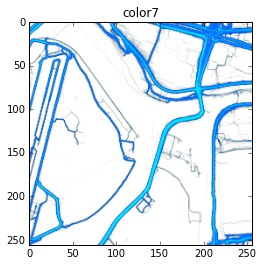

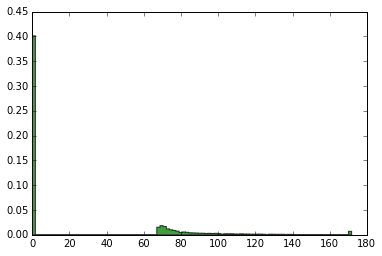

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.misc import imread,imsave
import requests as r
import math

def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.144])

def getTile(x, y, z, color=3):
    """
        return np.array for strava heatmap tile
    """
    # http://globalheat.strava.com/tiles/cycling/color4/13/4948/2560.png
    assert 0 <= color < 8, "Color should be between 0 and 8"
    url = "http://globalheat.strava.com/tiles/cycling/color%d/%d/%d/%d.png" % (color, z, x, y)

    ret = r.get(url)
    filename = 'tmp.png'
    chunk_size=1024
    with open(filename, 'wb') as fd:
        for chunk in ret.iter_content(chunk_size):
            fd.write(chunk)
    return imread(filename)


for c in xrange(0, 8):
    x, y, z = 4948, 2560, 13
    tile = getTile(x, y, z, color=c)    
    plt.imshow(tile)     
    plt.title('color%d' % c)
    plt.show()

    gray = rgb2gray(tile)

    # gray.flatten()
    # hist, bin_edges = np.histogram(gray.flatten(), density=True)
    plt.hist(gray.flatten(), 100, normed=1, histtype='stepfilled', facecolor='g', alpha=0.75)
    plt.show()

In [24]:
print x
print float(x) / 2 ** z * 180 / math.pi

4948
34.6068746375


In [34]:
def deg2num(lat_deg, lon_deg, zoom):
    lat_rad = math.radians(lat_deg)
    n = 2.0 ** zoom
    xtile = int((lon_deg + 180.0) / 360.0 * n)
    ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
    return (xtile, ytile)

def num2deg(xtile, ytile, zoom):
    n = 2.0 ** zoom
    lon_deg = xtile / n * 360.0 - 180.0
    lat_rad = math.atan(math.sinh(math.pi * (1.0 - 2.0 * ytile / n)))
    lat_deg = math.degrees(lat_rad)
    return (lat_deg, lon_deg)
num2deg(x, y, z)

(55.7765730186677, 37.44140625)

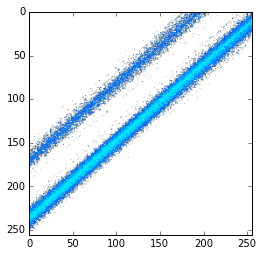

In [33]:
plt.imshow(getTile(x * 16, y * 16, z + 4))

In [37]:
deg2num(55.91, 37.93, 13)

(4959, 2554)

In [53]:
zoom = 13
xmin, ymax = deg2num(55.55, 37.3, zoom)
xmax, ymin = deg2num(55.90, 37.93, zoom)
print xmin, xmax
print ymin, ymax
total = (xmax - xmin) * (ymax - ymin)
for x in xrange(xmin, xmax + 1):
    for y in xrange(ymin, ymax + 1):
        progress = (ymax - ymin) * (x - xmin) + y - ymin
        progress = float(progress) / total
        if int(progress * 100) % 10 == 0:
            print progress
        tile = getTile(x, y, z)
        imsave('tiles/%d_%d_%d.png' % (x, y, z), tile)

4944 4959
2554 2569
0.0
0.00444444444444
0.00888888888889
0.102222222222
0.106666666667
0.2
0.2
0.204444444444
0.208888888889
0.302222222222
0.306666666667
0.4
0.4
0.404444444444
0.408888888889
0.502222222222
0.506666666667
0.6
0.6
0.604444444444
0.608888888889
0.702222222222
0.706666666667
0.8
0.8
0.804444444444
0.808888888889
0.902222222222
0.906666666667
1.0
1.0
1.00444444444
1.00888888889
